In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 당별로 부정/긍정 빈도수 확인

In [10]:
df = pd.read_csv('./data/news_2016_긍정부정결과_BertTokenizer.csv')
# df = df[df['party_name'] != '코리아']

df

,party_content,party_name,label
0,[이데일리 더불어 기자]與 서울 마포갑 강승규 탈락…안대희 공천확정더불어 (skze...,더불어민주당,0
1,야권연대가 사실상 실현 불가능해진 상황에서 국민의당을 공격해 제3당의 존재감...,국민의당,1
2,새누리당 색인 빨간색 천만 걸렸다,새누리당,0
3,다만 제18대 국회의원으로서 이 지역에서 기반을 다져온 무소속 전 의원이 안...,무소속,1
4,의 4·13 총선 후보자 공천 작업이 사실상 마무리됐다,민주당,0
...,...,...,...
344505,"청주상당(더불어), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역...",더불어민주당,0
344506,"청주상당(), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역 후보...",민주당,0
344507,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",더불어민주당,1
344508,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, , ...",민주당,1


In [5]:
df['label'].unique()

array([0, 1], dtype=int64)

In [11]:
df['label'] = df['label'].apply(lambda x: '긍정' if x != 1 else '부정')

In [12]:
df.head()

,party_content,party_name,label
0,[이데일리 더불어 기자]與 서울 마포갑 강승규 탈락…안대희 공천확정더불어 (skze...,더불어민주당,긍정
1,야권연대가 사실상 실현 불가능해진 상황에서 국민의당을 공격해 제3당의 존재감...,국민의당,부정
2,새누리당 색인 빨간색 천만 걸렸다,새누리당,긍정
3,다만 제18대 국회의원으로서 이 지역에서 기반을 다져온 무소속 전 의원이 안...,무소속,부정
4,의 4·13 총선 후보자 공천 작업이 사실상 마무리됐다,민주당,긍정


In [13]:
res_dic = {}


for party, label in zip(df['party_name'], df['label']):
    if party not in res_dic:
        res_dic[party] = {'긍정' : 0, '부정' : 0}
    else:
        res_dic[party][label] += 1

for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 더불어민주당
긍정 : 23243
부정 : 37157
당 : 국민의당
긍정 : 16764
부정 : 41735
당 : 새누리당
긍정 : 28980
부정 : 60843
당 : 무소속
긍정 : 5302
부정 : 15686
당 : 민주당
긍정 : 24456
부정 : 42635
당 : 코리아
긍정 : 18252
부정 : 11930
당 : 정의당
긍정 : 4094
부정 : 6464
당 : 친반통합
긍정 : 7
부정 : 51
당 : 한나라당
긍정 : 127
부정 : 1377
당 : 복지국가당
긍정 : 206
부정 : 613
당 : 민중연합당
긍정 : 372
부정 : 1111
당 : 노동당
긍정 : 178
부정 : 687
당 : 한국국민당
긍정 : 23
부정 : 86
당 : 녹색당
긍정 : 123
부정 : 342
당 : 기독자유당
긍정 : 110
부정 : 371
당 : 불교당
긍정 : 3
부정 : 9
당 : 공화당
긍정 : 214
부정 : 383
당 : 고용복지연금선진화연대
긍정 : 21
부정 : 148
당 : 친반통일당
긍정 : 33
부정 : 51
당 : 진리대한당
긍정 : 9
부정 : 58
당 : 친반평화통일당
긍정 : 6
부정 : 48
당 : 통일한국당
긍정 : 5
부정 : 51
당 : 일제·위안부·인권정당
긍정 : 0
부정 : 7
당 : 개혁국민신당
긍정 : 3
부정 : 59
당 : 기독당
긍정 : 8
부정 : 21
당 : 대한민국당
긍정 : 4
부정 : 18


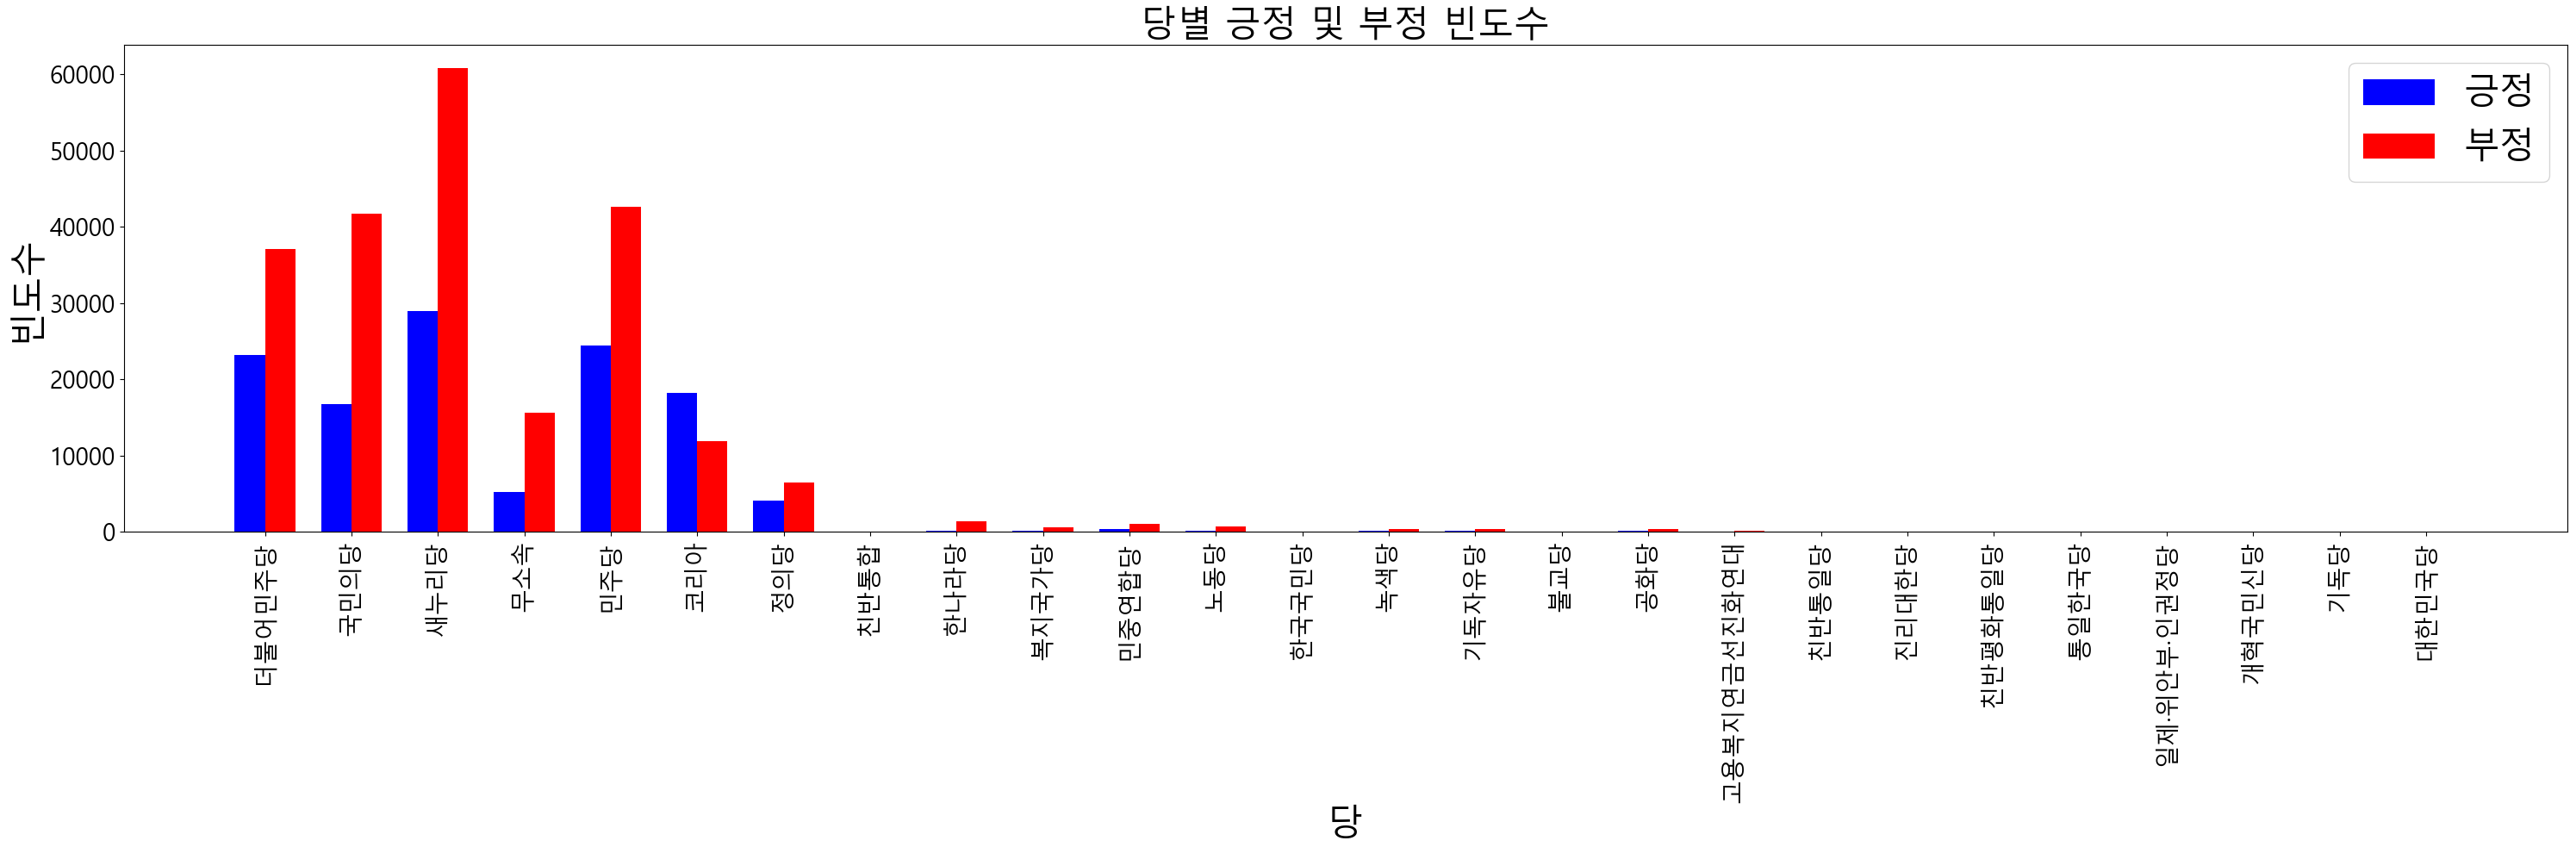

In [14]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')
plt.yticks(fontsize=20)

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [15]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(26, 2)


,긍정,부정
더불어민주당,23243,37157
국민의당,16764,41735
새누리당,28980,60843
무소속,5302,15686
민주당,24456,42635
코리아,18252,11930
정의당,4094,6464
친반통합,7,51
한나라당,127,1377
복지국가당,206,613


# 당선 여부 확인

In [16]:
res_df = pd.read_csv('./data/news_2016_당선결과.csv')
res_df

,name,party
0,강길부,무소속
1,강병원,새누리당
2,강석진(姜錫振),새누리당
3,강석호(姜碩鎬),새누리당
4,강창일,더불어민주당
...,...,...
164,추혜선,정의당
165,표창원,더불어민주당
166,하태경,새누리당
167,한선교,새누리당


In [17]:
res_gb = res_df.groupby(['party']).count().reset_index()

res_gb

,party,name
0,국민의당,12
1,더불어민주당,81
2,무소속,4
3,바른미래당,1
4,새누리당,67
5,자유한국당,2
6,정의당,2


In [18]:
# 부정 긍정 빈도수

num_df = num_df.reset_index()
num_df.columns = [['party', 'pos', 'neg']]
num_df.head()

,party,pos,neg
0,더불어민주당,23243,37157
1,국민의당,16764,41735
2,새누리당,28980,60843
3,무소속,5302,15686
4,민주당,24456,42635


In [19]:
# 멀티 인덱스 삭제

num_df.columns = num_df.columns.get_level_values(0)
num_df.columns

Index(['party', 'pos', 'neg'], dtype='object')

In [20]:
# 빈도수, 당선 수
num_res_df = pd.merge(res_gb, num_df, on = 'party', how = 'right')
num_res_df.fillna(0, inplace = True)
num_res_df.columns = [['party', 'res', 'pos', 'neg']]
num_res_df.columns = num_res_df.columns.get_level_values(0)
num_res_df = num_res_df.sort_values('res', ascending = False)
num_res_df = num_res_df.reset_index(drop = True)

num_res_df

,party,res,pos,neg
0,더불어민주당,81.0,23243,37157
1,새누리당,67.0,28980,60843
2,국민의당,12.0,16764,41735
3,무소속,4.0,5302,15686
4,정의당,2.0,4094,6464
5,불교당,0.0,3,9
6,기독당,0.0,8,21
7,개혁국민신당,0.0,3,59
8,일제·위안부·인권정당,0.0,0,7
9,통일한국당,0.0,5,51


In [21]:
num_res_df.to_csv('./data/news_2016_결과.csv', index = False)

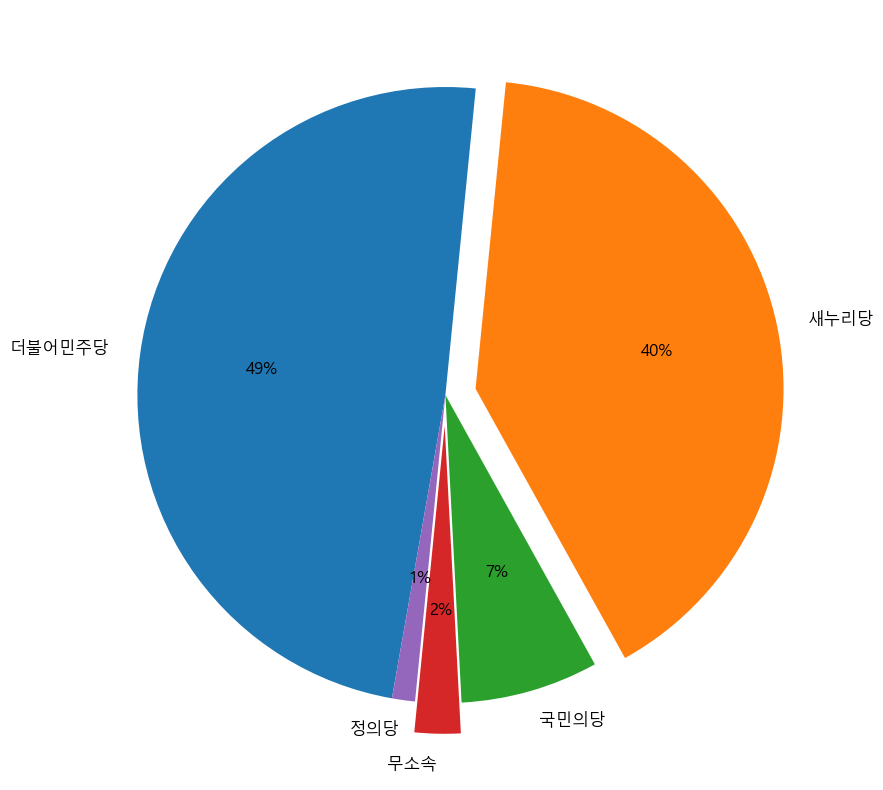

In [66]:
df = num_res_df[:5]

ratio = list(df['res'].values)
labels = list(df['party'].values)
explode = [0, 0.10, 0, 0.10, 0]

plt.figure(figsize = (10, 10))
plt.rcParams.update({'font.size': 12})  # 원하는 폰트 크기로 변경
plt.pie(ratio, labels = labels, startangle=260, autopct='%1.0f%%', counterclock = False, explode = explode);

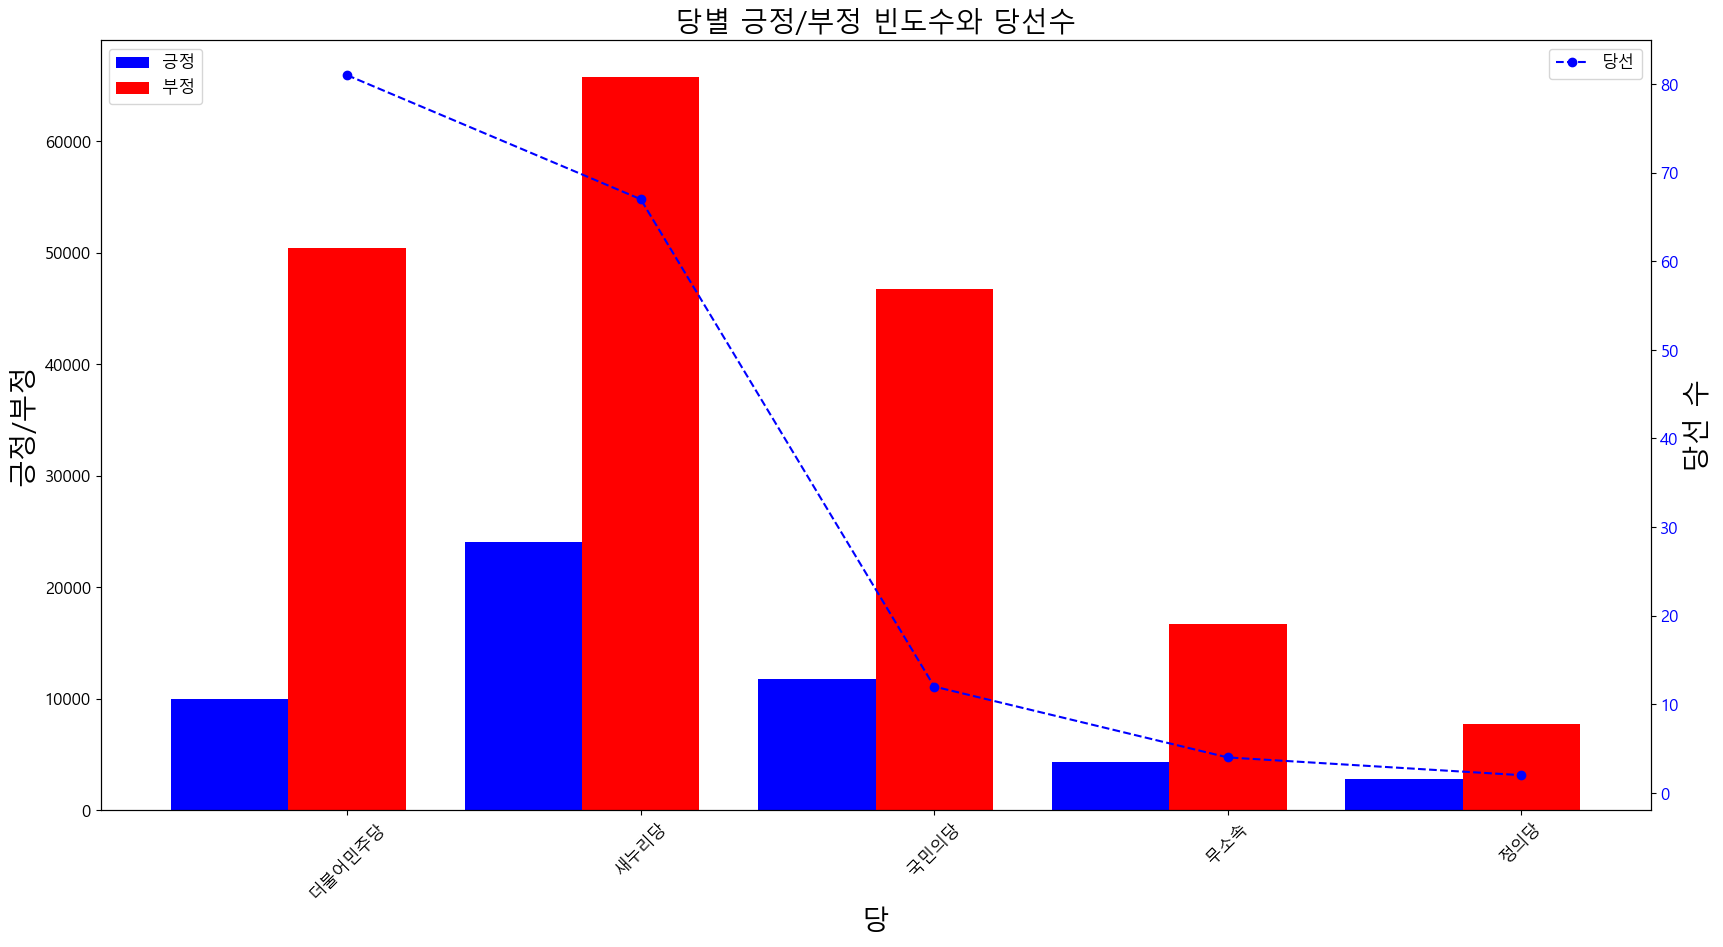

In [67]:
# 2중 그래프

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot() # bar 그래프


# bar 그래프 그리기
bar_width = 0.4
index = np.arange(len(df))
ax1.set_xticks(index);
ax1.set_xticklabels(df['party']);
ax1.bar(index - bar_width, df['pos'], bar_width, color = 'blue', label = '긍정')
ax1.bar(index, df['neg'], bar_width, color = 'red', label = '부정');
plt.xticks(rotation = 45);
plt.xlabel('당', fontsize = 20);
plt.ylabel('긍정/부정', fontsize = 20);
ax1.legend(loc = 'upper left');

# 선 그래프 그리기
ax2 = ax1.twinx();
ax2.plot(index, df['res'], color='b', linestyle='--', marker = 'o', label = '당선');
ax2.tick_params(axis = 'y', labelcolor = 'b');
plt.ylabel('당선 수', fontsize = 20);
ax2.legend();
plt.title('당별 긍정/부정 빈도수와 당선수', fontsize=20);